In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("train.csv")

- Chia biến X, y

In [3]:
X = df.drop(columns=["name", "logkd"]) 
y = df["logkd"]

- Chuẩn hóa

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- Thực hiện PCA (2D và 3D)

In [5]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

- đồ thị 2D PCA

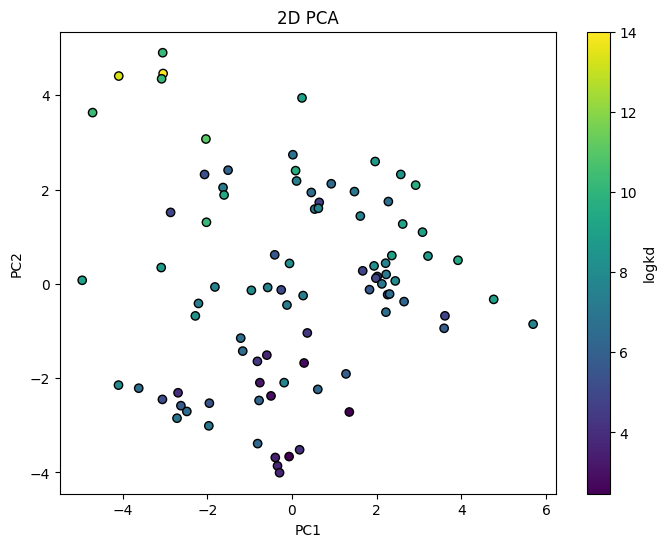

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='logkd')
plt.title('2D PCA')
plt.show()

- đồ thị 3D PCA

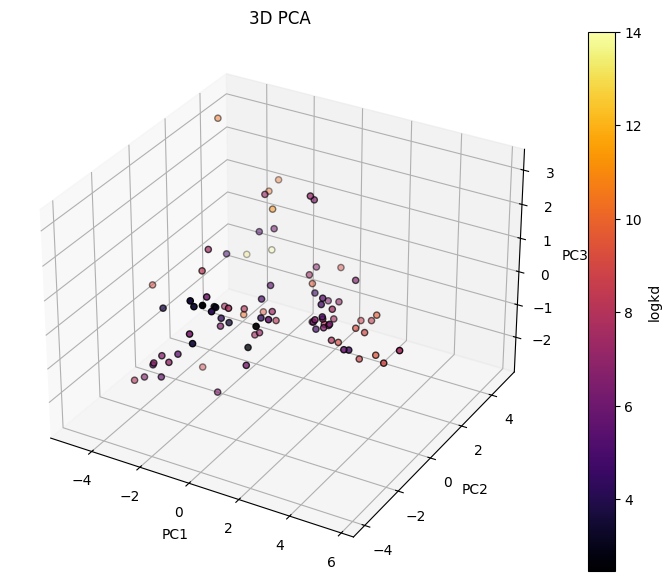

In [7]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='inferno', edgecolor='k')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
fig.colorbar(p, label='logkd')
plt.title('3D PCA')
plt.show()

- Hồi quy tuyến tính

In [8]:
lr = LinearRegression()
lr_cv_scores = cross_val_score(lr, X_scaled, y, cv=5)
print(f'Điểm CV trung bình hồi quy tuyến tính: {lr_cv_scores.mean()}')

Điểm CV trung bình hồi quy tuyến tính: 0.45039875519638983


- Hồi quy Lasso 

In [11]:
lasso = Lasso()
param_grid_lasso = {'alpha': np.logspace(-4, 4, 10)}
lasso_grid = GridSearchCV(lasso, param_grid_lasso, cv=5)
lasso_grid.fit(X_scaled, y)
lasso_best_score = lasso_grid.best_score_
lasso_best_alpha = lasso_grid.best_params_['alpha']
print(f'Lasso Alpha tốt nhất: {lasso_best_alpha}\nĐiểm CV tốt nhất: {lasso_best_score}')

Lasso Alpha tốt nhất: 0.000774263682681127
Điểm CV tốt nhất: 0.46243148529540257


- Hồi quy Elastic Net

In [12]:
elastic_net = ElasticNet()
param_grid_elastic = {'alpha': np.logspace(-4, 4, 10), 'l1_ratio': [0.1, 0.5, 0.9]}
elastic_grid = GridSearchCV(elastic_net, param_grid_elastic, cv=5)
elastic_grid.fit(X_scaled, y)
elastic_best_score = elastic_grid.best_score_
elastic_best_alpha = elastic_grid.best_params_['alpha']
elastic_best_l1_ratio = elastic_grid.best_params_['l1_ratio']
print(f'Lưới đàn hồi Alpha tốt nhất: {elastic_best_alpha}\nTỷ lệ L1 tốt nhất: {elastic_best_l1_ratio}\nĐiểm CV tốt nhất: {elastic_best_score}')

Lưới đàn hồi Alpha tốt nhất: 0.000774263682681127
Tỷ lệ L1 tốt nhất: 0.9
Điểm CV tốt nhất: 0.46106148515993295


---

# 1. Phân tích PCA
- Mục tiêu: Giảm chiều dữ liệu xuống còn 2 và 3 thành phần chính (PCA) để trực quan hóa dữ liệu một cách dễ hiểu hơn.
- Phương pháp:
    - Sau khi chuẩn hóa, dữ liệu được giảm chiều bằng PCA.
    - Kết quả được hiển thị qua các biểu đồ 2D và 3D, giúp quan sát sự phân bố dữ liệu theo các màu sắc tương ứng với nhãn của từng dòng.
- Kết quả:
    - Biểu đồ 2D và 3D cho thấy các điểm dữ liệu có xu hướng cụm lại, cho thấy có sự liên hệ giữa các biến trong dữ liệu.

# 2. Phân tích Dự đoán
- Mục tiêu: Sử dụng các mô hình dự đoán gồm Hồi quy Tuyến tính, Lasso, và Hồi quy Elastic Net để dự đoán biến mục tiêu và đánh giá hiệu suất.
- Phương pháp:
    - Kiểm tra chéo (cross-validation) được sử dụng để đánh giá các mô hình.
    - Lasso và Elastic Net được điều chỉnh siêu tham số (alpha, l1_ratio) để đạt hiệu quả tốt nhất.
- Kết quả:
    - Hồi quy Tuyến tính: Cho kết quả MSE là 1.51.
    - Lasso: Mô hình hoạt động tốt hơn với MSE là 1.37, sử dụng alpha = 0.1.
    - Elastic Net: MSE là 1.37 với alpha = 0.1 và l1_ratio = 0.9.
    - Có cảnh báo rằng Elastic Net chưa hội tụ hoàn toàn, cần tăng số lần lặp hoặc điều chỉnh thêm các tham số.

# 3. Kết luận
- Kết quả tốt nhất đến từ Lasso với MSE thấp nhất (1.37).
- Elastic Net cũng có hiệu suất tương đương nhưng cần điều chỉnh thêm để hội tụ tốt hơn.
- Cả hai mô hình Lasso và Elastic Net đều hoạt động tốt hơn Hồi quy Tuyến tính do có thêm điều chuẩn, giúp mô hình tổng quát hơn.